<a href="https://colab.research.google.com/github/anshupandey/Reinforcement-Learning/blob/main/Code_RL_Temporal_difference_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 12 Reinforcement Learning 

##Lab-1: Temporal Difference and Q Learning

##Objectives
***

* SARSA in Reinforcement Learning

### SARSA in Reinforcement Learning
***

SARSA is a modified Q-learning algorithm where the target policy is same as behaviour policy. The two consecutive state-action target pairs and the immediate reward received by the agent while transitioning from first state to next state determine the updated Q value, so this method is called SARSA. 

SARSA: State(S), Action(A), Rewards(R), State(S'), Action(A')

As target policy is same as behaviour policy, it is an on-policy algorithm.

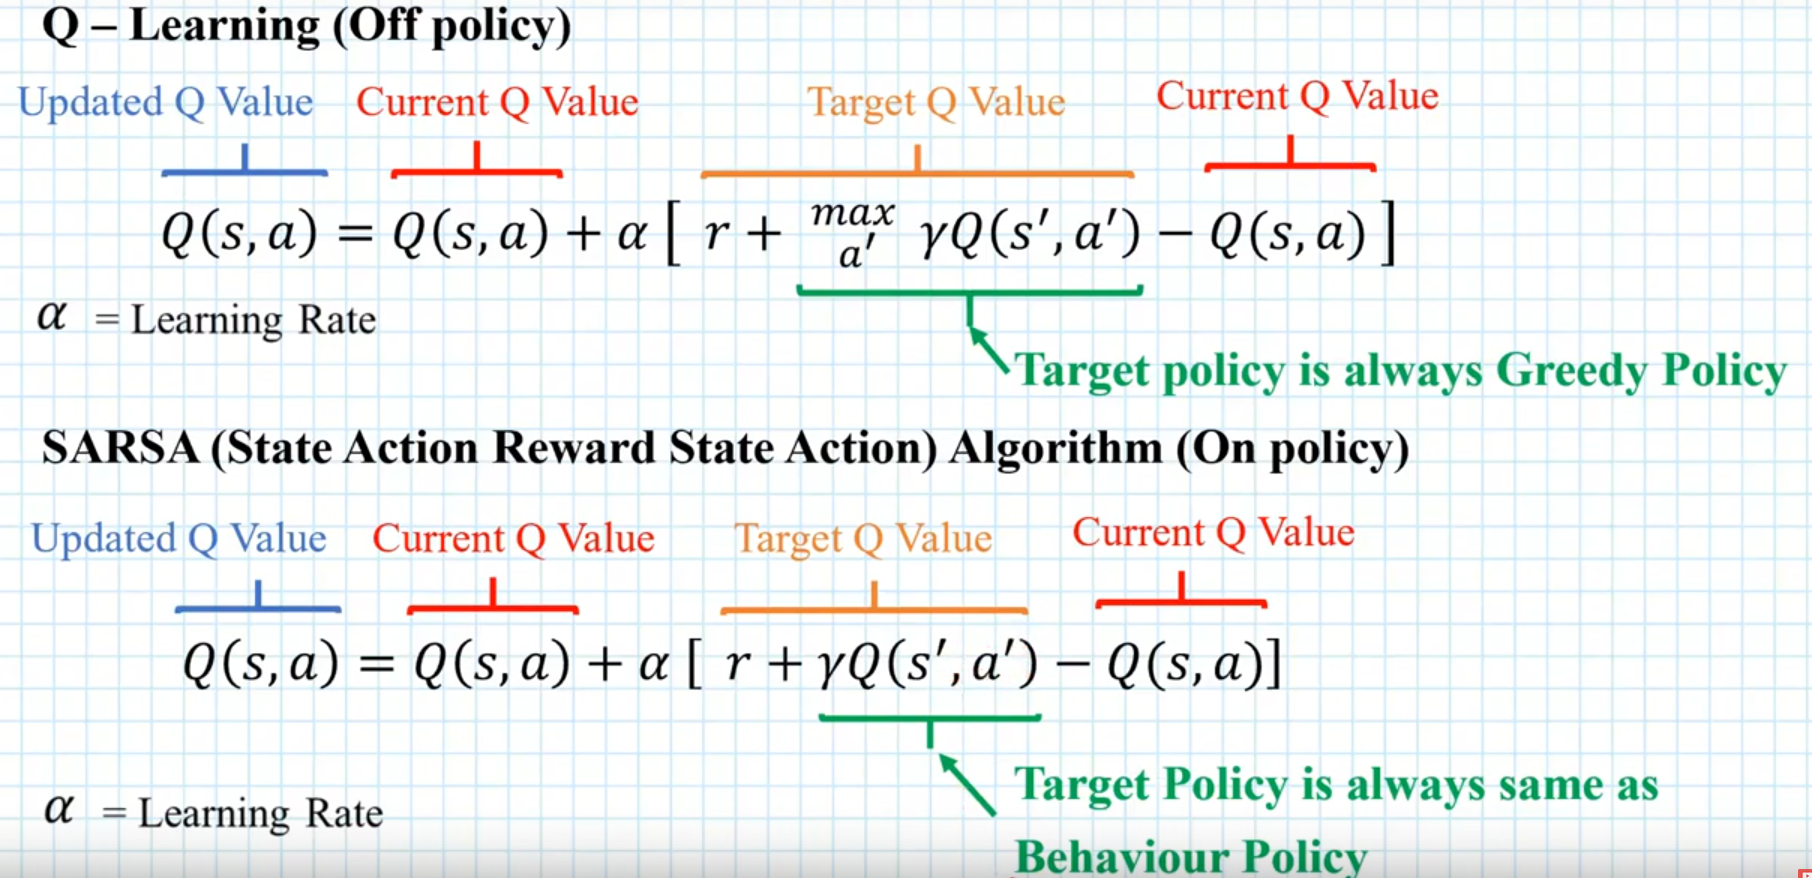

In [ ]:
import numpy as np
import gym

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

### Action Space
The agent takes a 1-element vector for actions.
The action space is `(dir)`, where `dir` decides direction to move in which can be:
  - 0: LEFT
  - 1: DOWN
  - 2: RIGHT
  - 3: UP

### Observation Space
The observation is a value representing the agent's current position as current_row * nrows + current_col (where both the row and col start at 0).
For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.

The number of possible observations is dependent on the size of the map.
For example, the 4x4 map has 16 possible observations.

### Rewards
Reward schedule:
  - Reach goal(G): +1
  - Reach hole(H): 0
  - Reach frozen(F): 0

Let us initialize our environment and render it.

In [ ]:
env = gym.make('FrozenLake-v0')
print(env.observation_space)
print(env.action_space)
env.render()

Discrete(16)
Discrete(4)

SFFF
FHFH
FFFH
HFFG


Initialize the parameters

In [ ]:
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95
 
#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))

Defining utility functions to be used in the learning process

In [ ]:
#Function to choose the next action
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action
 
#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

Now we train the learning agent. 

In [ ]:
#Initializing the reward
reward=0
 
# Starting the SARSA learning
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
 
    while t < max_steps:
        #Visualizing the training
        env.render()
         
        #Getting the next state
        state2, reward, done, info = env.step(action1)
 
        #Choosing the next action
        action2 = choose_action(state2)
         
        #Learning the Q-value
        update(state1, state2, reward, action1, action2)
 
        state1 = state2
        action1 = action2
         
        #Updating the respective vaLues
        t += 1
        reward += 1
         
        #If at the end of learning process
        if done:
            break

Streaming output truncated to the last 5000 lines.
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFF


In the above output, the red mark determines the current position of the agent in the environment while the direction given in brackets gives the direction of movement that the agent will make next. Note that the agent stays at it’s position if goes out of bounds.

Calculate the performance. 

In [ ]:
#Evaluating the performance
print ("Performance : ", reward/total_episodes)
 
#Visualizing the Q-matrix
print(Q)

Performance :  0.0001
[[1.15172091e-03 2.17275990e-03 2.27731264e-03 2.12890410e-04]
 [1.21686027e-05 1.38670352e-03 3.85125638e-03 1.17938166e-03]
 [9.73978642e-03 1.15231663e-03 1.25819752e-03 5.05669982e-03]
 [1.73731475e-05 3.20240039e-03 7.29094713e-06 1.11449400e-03]
 [1.22035540e-02 3.33956226e-05 5.76248247e-04 3.39234414e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.34352508e-03 1.59719096e-03 1.86750356e-03 2.58919932e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.30741404e-02 8.39605173e-05 4.43549687e-03 1.61962475e-03]
 [4.48210918e-02 1.19162542e-02 5.11826670e-02 2.56133243e-04]
 [2.36381391e-01 1.25144583e-01 2.77541709e-02 8.61957279e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.24643637e-01 4.70030777e-02 6.67637657e-01 1.62529800e-01]
 [3.18608042e-02 1.55344353e-01 5.86249232e-01 6.74768837e-01]
 [0.00000000e+00 0.00000000e+00 0

##Thank You !